In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [2]:
#讀檔
#請輸入程式碼
dataset = pd.read_csv('input/titanic.csv')
dataset.head(50) #秀出前50筆資料出來看

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#觀察資料幾列幾行
#請輸入程式碼
dataset.shape

(891, 12)

In [4]:
#觀察整個資料集的資訊
#請輸入程式碼
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#設定seaborn為預設繪圖library
#請輸入程式碼
sns.set()

In [6]:
def bar_chart(feature):
    #請輸入程式碼
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

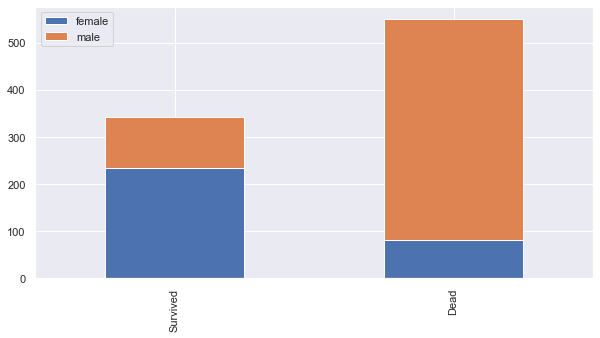

In [7]:
#分別秀出生還/死亡的男女長條圖
#請輸入程式碼
bar_chart('Sex')

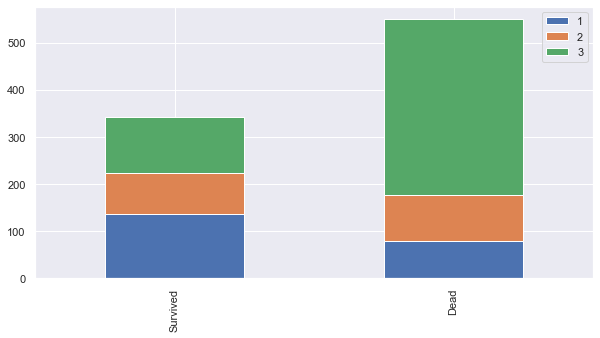

In [8]:
#分別秀出生還/死亡的艙等長條圖
#請輸入程式碼
bar_chart('Pclass')

In [9]:
# 計算各個行(欄位)裡有多少個“NaN”
#請輸入程式碼
dataset.isna().sum() #isnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [10]:
#觀察Name欄位
#請輸入程式碼
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
#取出Mr., Mrs., Miss.
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [12]:
#統計各稱謂的人數
#請輸入程式碼
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Ms            1
Capt          1
Don           1
Mme           1
Sir           1
Lady          1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

In [13]:
#titlemapping
title_mapping = {"Mr": 0,"Miss": 1, "Mrs": 2,"Master": 3, "Dr": 3,"Rev": 3,"Mlle": 3,"Major": 3,"Col": 3,"Jonkheer": 3,"Capt": 3,"Lady": 3,"Countess": 3,"Ms": 3,"Mme": 3,"Don": 3, "Sir": 3}
dataset['Title'] = dataset['Title'].map(title_mapping)
#方法2
#result = []
#title_mapping = {'Mr':0, 'Miss':1, 'Mirs':2}
#for items in dataset['Title']:
#    result.append(title_mapping.get(items,3))
#dataset['Title'] = result

In [14]:
#現在的dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


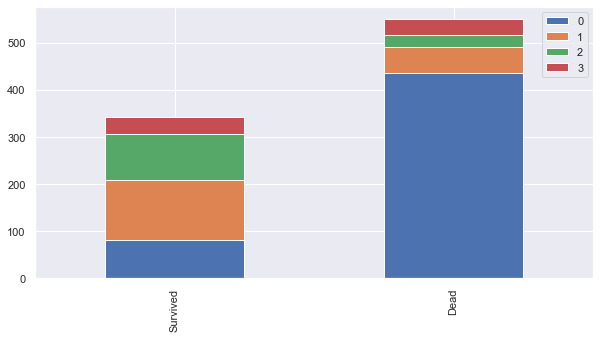

In [16]:
#秀出Title/生還死亡的分佈
#請輸入程式碼
bar_chart('Title')

In [17]:
#刪除Name欄位
#請輸入程式碼
dataset.drop('Name',axis = 1, inplace = True)

In [18]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


# Sex

In [19]:
#mapping sex
#請輸入程式碼
sex_mapping = {'male':0,'female':1}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

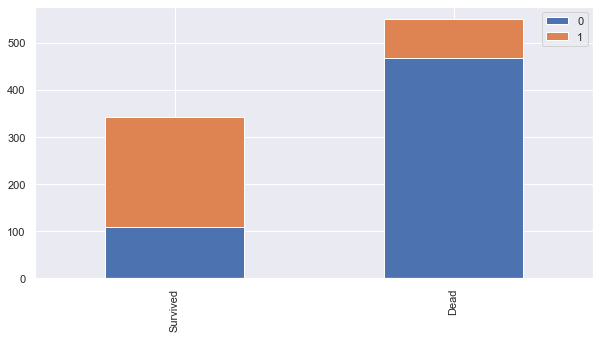

In [20]:
bar_chart('Sex')

In [21]:
#目前的ddataframe
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,NaN,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,71.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,23.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,34.0,0,1,231919,23.0000,NaN,S,2


# Age

In [22]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
#請輸入程式碼
dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"),inplace = True)
dataset["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    21.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

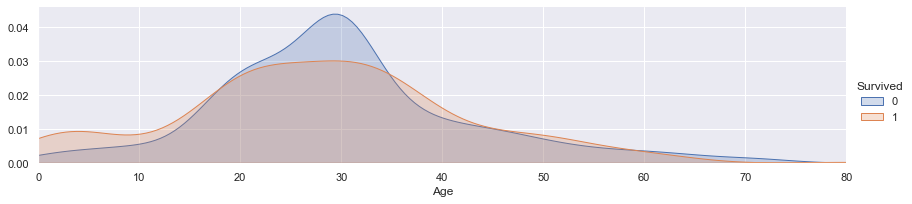

In [23]:
#年齡/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [24]:
#依年齡區間做mapping function
#請輸入程式碼
dataset.loc[dataset['Age']<= 16 ,'Age']=0
dataset.loc[(dataset['Age']> 16) & (dataset['Age']<= 26) ,'Age']=1
dataset.loc[(dataset['Age']> 26) & (dataset['Age']<= 36) ,'Age']=2
dataset.loc[(dataset['Age']> 36) & (dataset['Age']<= 62) ,'Age']=3
dataset.loc[dataset['Age']> 62 ,'Age']=4

In [25]:
#目前的dataframe
dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,C,2


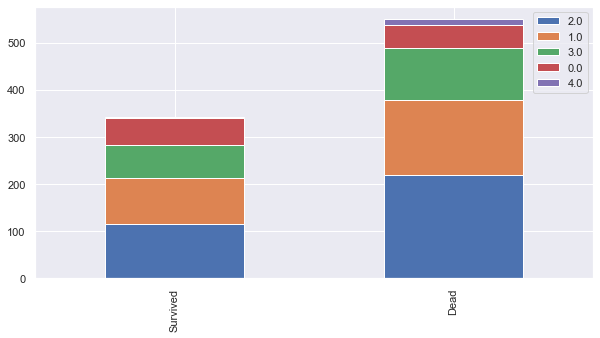

In [26]:
#秀出年齡/生還死亡的分佈
#請輸入程式碼
bar_chart('Age')

# Embarked (登船地點)

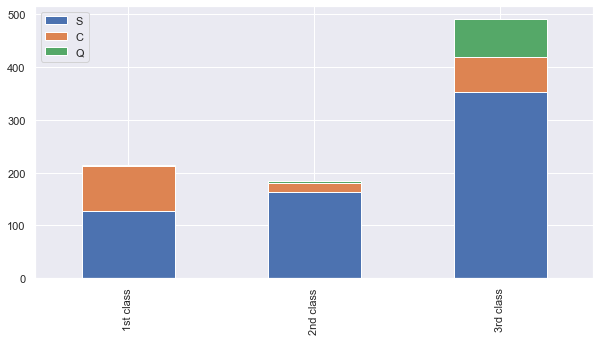

In [27]:
#分析各票種登船地點人數
#請輸入程式碼
Pclass1 = dataset[dataset['Pclass']==1]['Embarked'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Embarked'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [28]:
#填補登船地點缺失資料
#請輸入程式碼
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,S,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,C,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,C,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,S,2


In [29]:
# 登船地點的Mapping Function
#請輸入程式碼
embarked_mapping = {'S':0,'C':1,'Q':2}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
dataset.head(100)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,0,2.0,0,0,374910,8.0500,NaN,0,0
96,97,0,1,0,4.0,0,0,PC 17754,34.6542,A5,1,0
97,98,1,1,0,1.0,0,1,PC 17759,63.3583,D10 D12,1,0
98,99,1,2,1,2.0,0,1,231919,23.0000,NaN,0,2


# Fare(票價)

In [30]:
#填補票價缺失的資料 
#請輸入程式碼
dataset["Fare"].fillna(dataset.groupby("Pclass")["Fare"].transform("median"),inplace = True)
dataset.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


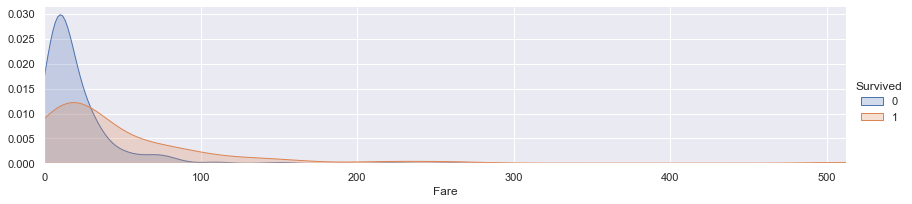

In [31]:
#票價/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [32]:
#依票價區間做mapping function
#請輸入程式碼
dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
dataset.loc[(dataset['Fare'] >17) & (dataset['Fare'] <= 30), 'Fare'] =1
dataset.loc[(dataset['Fare'] >30) & (dataset['Fare'] <= 100), 'Fare'] =2
dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3


In [33]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [34]:
#觀察船艙編號資料
#請輸入程式碼
dataset['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
D              3
              ..
D15            1
D48            1
B69            1
A23            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [35]:
#觀察船艙編號資料 =>取出第一個字母
#請輸入程式碼
dataset['Cabin'] = dataset['Cabin'].str[:1]
dataset['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

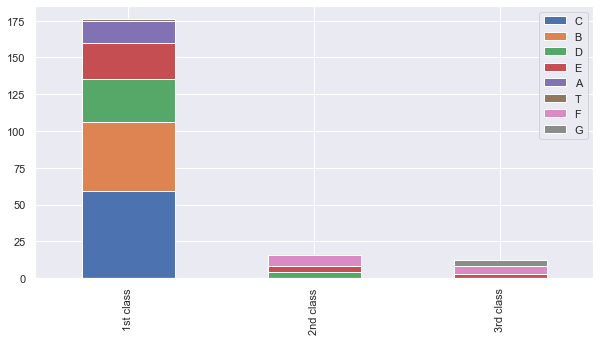

In [36]:
#分析各票種船艙種類人數
#請輸入程式碼
Pclass1 = dataset[dataset['Pclass']==1]['Cabin'].value_counts()
Pclass2 = dataset[dataset['Pclass']==2]['Cabin'].value_counts()
Pclass3 = dataset[dataset['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
#船艙Mapping
#請輸入程式碼
cabin_mapping ={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [38]:
#填補船艙種類缺失資料
#請輸入程式碼
dataset["Cabin"].fillna(dataset.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [39]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0


# Sibsp & Parch

In [40]:
#合併Sibsp & Parch
#請輸入程式碼
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1 # +1 是因為加自己

(0.0, 11.0)

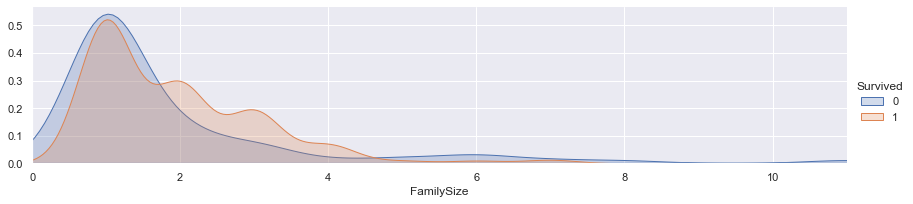

In [41]:
#家族人口/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [42]:
#家族人口的Mapping Function
#請輸入程式碼
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [43]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


# 資料清洗

In [44]:
#刪除Sibsp, Parch, Ticket
#請輸入程式碼
features_drop = ['Ticket', 'SibSp', 'Parch','PassengerId']
dataset = dataset.drop(features_drop, axis=1)

In [45]:
#設定預測目標變數與解釋變數
#請輸入程式碼
dataset_data = dataset.drop('Survived', axis=1)
dataset_target = dataset[['Survived']]
dataset_data.shape, dataset_target.shape

((891, 8), (891, 1))

In [46]:
#目前的所有解釋變數
dataset_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [47]:
#確認欄位的資料型態均為數值型別
#請輸入程式碼
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       891 non-null    int64  
 8   FamilySize  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


# 建置模型-DNN

In [48]:
#導入keras與sklearn
#請輸入程式碼
from keras.models import Sequential
from keras.layers.core import Dense,Activation 
from keras.optimizers import Adam
from sklearn import preprocessing

In [49]:
#建立模型函式
#請輸入程式碼
def build_model():
        #建立模型
        model = Sequential()
        #將模型疊起
        model.add(Dense(input_dim=8,units=40))
        model.add(Activation('relu'))
        model.add(Dense(units=100))
        model.add(Activation('relu'))
        model.add(Dense(units=10))
        model.add(Activation('relu'))
        model.add(Dense(units=1))
        model.add(Activation('sigmoid'))
        model.summary()
        return model

In [50]:
#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    #請輸入程式碼
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [51]:
#feature標準化
#請輸入程式碼
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(dataset_data)

In [52]:
#訓練模型
model = build_model()
#開始訓練模型
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['acc'])
train_history = model.fit(scaledFeatures, dataset_target,validation_split=0.2,batch_size=30,epochs=20)

#顯示訓練結果
score = model.evaluate(x=dataset_data, y=dataset_target)
print ('\nTrain Acc:', score[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                360       
_________________________________________________________________
activation (Activation)      (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

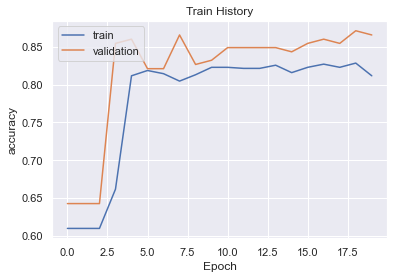

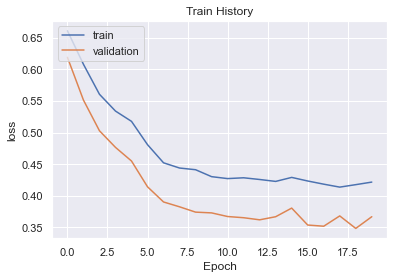

In [53]:
#顯示訓練結果
#請輸入程式碼
show_train_history(train_history,'acc','val_acc','accuracy')
show_train_history(train_history,'loss','val_loss','loss')

In [54]:
#probability=model.predict(test_data)

In [55]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [56]:
#讀檔
#請輸入程式碼
test_data = pd.read_csv('test-rosejack.csv')
test_data.head() #秀出資料出來看

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Jack, Mr.",male,23.0,0,0,A/5 21171,5.0,F87,S
1,2,1,"Rose, Miss.",female,20.0,0,1,PC 17599,100.0,C85,S


In [57]:
#觀察整個資料集的資訊
#請輸入程式碼
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  2 non-null      int64  
 1   Pclass       2 non-null      int64  
 2   Name         2 non-null      object 
 3   Sex          2 non-null      object 
 4   Age          2 non-null      float64
 5   SibSp        2 non-null      int64  
 6   Parch        2 non-null      int64  
 7   Ticket       2 non-null      object 
 8   Fare         2 non-null      float64
 9   Cabin        2 non-null      object 
 10  Embarked     2 non-null      object 
dtypes: float64(2), int64(4), object(5)
memory usage: 304.0+ bytes


In [58]:
#設定seaborn為預設繪圖library
#請輸入程式碼
sns.set()

In [59]:
# 計算各個行(欄位)裡有多少個“NaN”
#請輸入程式碼
test_data.isna().sum() #isnull()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [60]:
#取出Mr., Mrs., Miss
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [61]:
#titlemapping
title_mapping = {"Mr": 0,"Miss": 1}#請輸入程式碼
test_data['Title'] = test_data['Title'].map(title_mapping)

In [62]:
#現在的dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Jack, Mr.",male,23.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,"Rose, Miss.",female,20.0,0,1,PC 17599,100.0,C85,S,1


In [63]:
# 刪除Name欄位
#請輸入程式碼
test_data.drop('Name',axis = 1, inplace = True)

In [64]:
#目前的dataframe
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,male,23.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,female,20.0,0,1,PC 17599,100.0,C85,S,1


In [65]:
#mapping sex
#請輸入程式碼
sex_mapping = {'male':0, 'female':1}
test_data['Sex'] = test_data['Sex'].map(sex_mapping)

In [66]:
#目前的dataframe
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,23.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,1,20.0,0,1,PC 17599,100.0,C85,S,1


In [67]:
#依年齡區間做mapping function
#請輸入程式碼
test_data.loc[test_data['Age']<= 16 ,'Age']=0
test_data.loc[(test_data['Age']> 16) & (test_data['Age']<= 26) ,'Age']=1
test_data.loc[(test_data['Age']> 26) & (test_data['Age']<= 36) ,'Age']=2
test_data.loc[(test_data['Age']> 36) & (test_data['Age']<= 62) ,'Age']=3
test_data.loc[test_data['Age']> 62 ,'Age']=4

In [68]:
#目前的dataframe
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,5.0,F87,S,0
1,2,1,1,1.0,0,1,PC 17599,100.0,C85,S,1


In [69]:
# 登船地點的Mapping Function
#請輸入程式碼
embarked_mapping = {'S':0,'C':1,'Q':2}
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,5.0,F87,0,0
1,2,1,1,1.0,0,1,PC 17599,100.0,C85,0,1


In [70]:
#依票價區間做mapping function
#請輸入程式碼
test_data.loc[test_data['Fare'] <= 17, 'Fare'] = 0
test_data.loc[(test_data['Fare'] >17) & (test_data['Fare'] <= 30), 'Fare'] =1
test_data.loc[(test_data['Fare'] >30) & (test_data['Fare'] <= 100), 'Fare'] =2
test_data.loc[test_data['Fare'] > 100, 'Fare'] = 3


In [71]:
#目前的dataframe
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,0.0,F87,0,0
1,2,1,1,1.0,0,1,PC 17599,2.0,C85,0,1


In [72]:
#觀察船艙編號資料 =>取出第一個字母
#請輸入程式碼
test_data['Cabin'] = test_data['Cabin'].str[:1]
test_data['Cabin']

0    F
1    C
Name: Cabin, dtype: object

In [73]:
#船艙Mapping
#請輸入程式碼
cabin_mapping ={"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
test_data['Cabin'] = test_data['Cabin'].map(cabin_mapping)

In [74]:
#目前的dataframe
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,0,1.0,0,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1.0,0,1,PC 17599,2.0,0.8,0,1


In [75]:
#合併Sibsp & Parch
#請輸入程式碼
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [76]:
#家族人口的Mapping Function
#請輸入程式碼
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
test_data['FamilySize'] = test_data['FamilySize'].map(family_mapping)

In [77]:
#目前的dataframe
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,3,0,1.0,0,0,A/5 21171,0.0,2.0,0,0,0.0
1,2,1,1,1.0,0,1,PC 17599,2.0,0.8,0,1,0.4


In [78]:
#刪除Sibsp, Parch, Ticket
#請輸入程式碼
features_drop = ['Ticket', 'SibSp', 'Parch','PassengerId']
test_data = test_data.drop(features_drop, axis=1)

In [79]:
#目前的dataframe
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.0
1,1,1,1.0,2.0,0.8,0,1,0.4


In [81]:
probability = model.predict(test_data)

In [82]:
print(probability)

[[0.00493443]
 [0.8632202 ]]
